# cGAN

In [1]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare MNIST Data

In [4]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

In [5]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transform,
                          download=True)

In [6]:
batch_size = 100

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True)

In [7]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

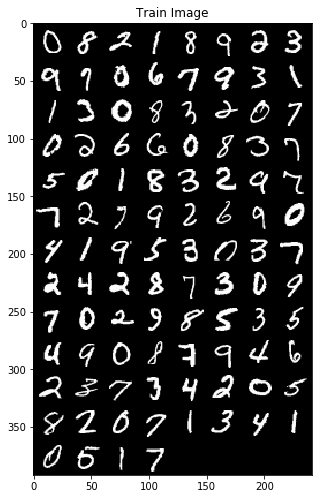

In [8]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

# Define Model

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
        )
        
        self.label_layer = nn.Sequential(
            nn.Linear(10, 256)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7 + 256, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 1),
            nn.Sigmoid()        
        )
        
    def forward(self, x, label):
        
        out = self.discriminator(x)
        out_img = out.view(-1, 64*7*7)
        out_label = self.label_layer(label)
        
        out = self.fc_layer(torch.cat([out_img, out_label], dim = 1))
        
        return out

In [10]:
D = Discriminator()

In [11]:
D(torch.rand(100, 1, 28, 28), torch.rand(100, 10)).shape

torch.Size([100, 1])

In [12]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
               
        self.latent_layer = nn.Sequential(
            nn.Linear(100, 256)
        )
        
        self.label_layer = nn.Sequential(
            nn.Linear(10, 256)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(256 + 256, 64*7*7)
        )
        
        self.generator = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1),
            nn.Tanh()
        )
        
    def forward(self, z, label):
        
        out_z = self.latent_layer(z)
        out_label = self.label_layer(label)
        
        out = self.fc_layer(torch.cat([out_z, out_label], dim = 1))
        out = out.view(-1, 64, 7, 7)
        out = self.generator(out)
        return out

In [13]:
G = Generator()

In [14]:
G(torch.rand(100, 100), torch.rand(100, 10)).shape

torch.Size([100, 1, 28, 28])